1-DEFINE THE PROBLEM

The goal of this project is to predict the median house value for California districts based on demographic and geographic data from the 1990 census.

2- IMPORT REQUIRED LIBRARIES 

2.1 - Base Libraries

I will use pandas for data handling (DataFrames),
numpy for numeric operations, and matplotlib/seaborn for data visualization.

2.2- ML/DL Libraries

import specific functions from the scikit-learn library that i require for ; preprocessing, model training and evaluation

3-LOAD THE DATA
Read the "housing.csv file located in a folder that i have created locally. the file is originally from professor's github classroom folders.
I find it easy and good practice to have it locally on my machine.

In [1]:
import pandas as pd
data = pd.read_csv('housing.csv')

4 - EDA (Exploratory Data Analysis) of the DATA

4.1 Basic Overview 
 
 On this, i am eyeing on displaying first five rows of the dataset to understand the structure of the data and preview the features available for analysis and modelling.

In [2]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.isnull().sum().sort_values(ascending=False)
#for my own understanding "sort_values" sorts the values in ascending order


data.isnull().mean().sort_index(ascending=False)
#for my own understanding "sort_index" sorts the index in descending order

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
#But fot the exercise given, this is the code used to find the output
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

4.3 - Analyze Data Types
# I want to achive, displaying the data types of each column in the dataset
# this helps us identify which features are NUMERICAL and which are CATEGORICAL

In [13]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

5- VISUALIZE THE DATA

5.1 Univariate Analysis

# I want to visualize the distribution of individual features to better understand their value ranges and categories.
# visualize the distribution of the median house value using a histogram with KDE (smoothed line).
# the will help us identify skewness, concentration, and outliers in the target variable

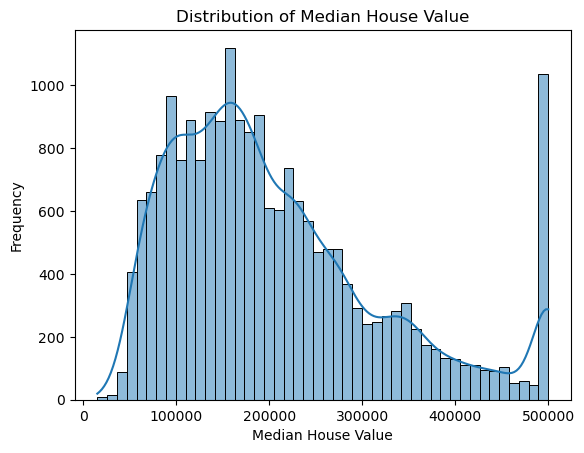

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


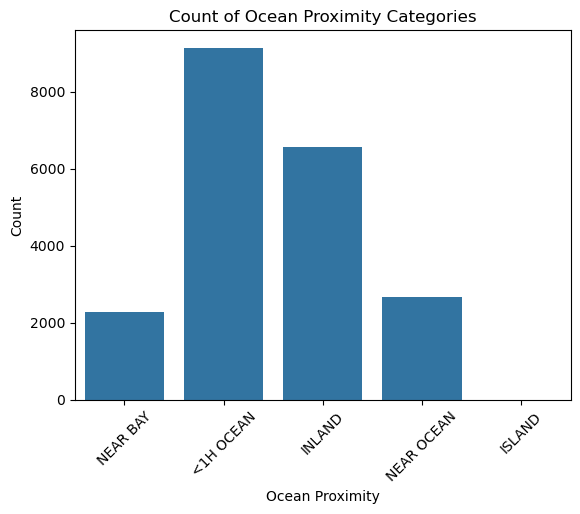

In [19]:
sns.countplot(x='ocean_proximity', data=data)
plt.title('Count of Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

5.2 -   Bivariate / Multivariate Analysis
# Create a scatter plot to explore the relationship between median income and median house value.
# This helps us detect possible correlations and trends between these two numerical features.

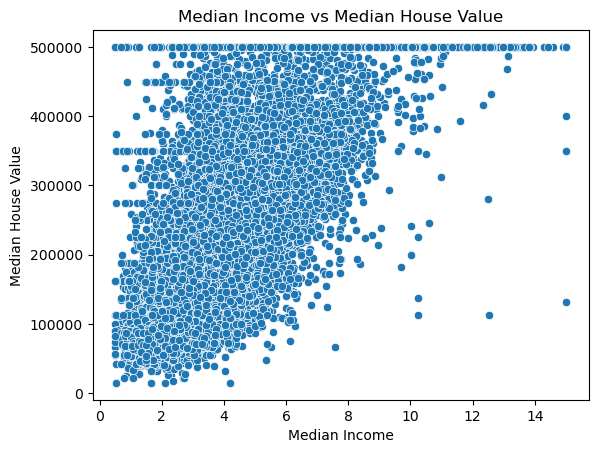

In [20]:
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

5.3 Correlation Matrix Heatmap

# Display a correlation matrix heatmap for all numeric features.
# This visual summary helps identify which features are strongly correlated, either positively or negatively 
# Values closer to 1 or -1 indicate stonger linear relationships

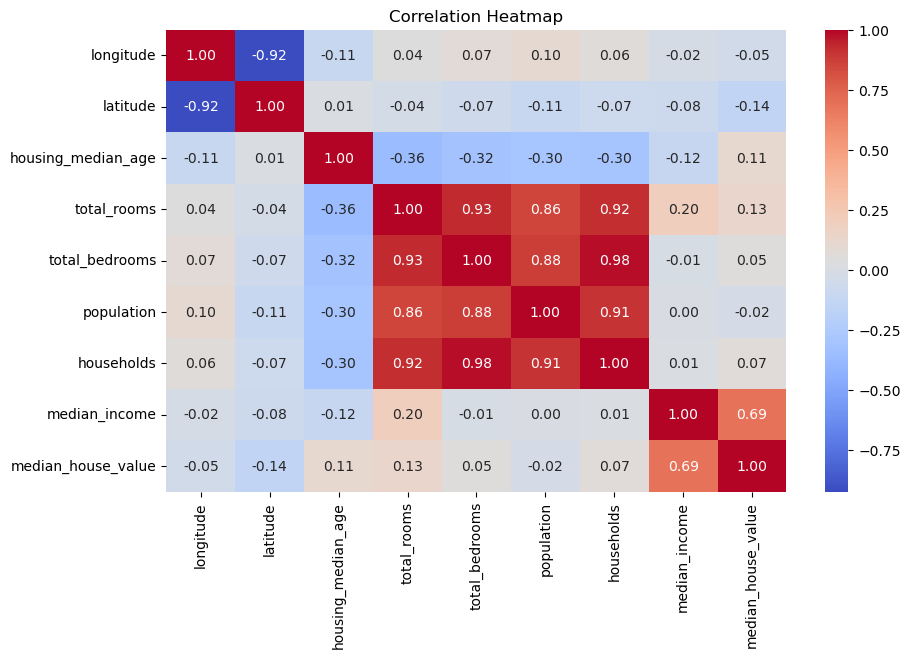

In [23]:
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Save the cleaned data to a new CSV file
data.to_csv('cleaned_housing.csv', index=False)

6- PREPROCESS THE DATA


6.1 - HANDLE MISSING VALUES 

# Create a working copy of the dataset, excluding the target variable
# This will allow us to impute missing values without affecting the original target.

# Step 1: Copy the original dataset and drop the target 

In [ ]:
X = data.drop(columns=['median_house_value'])

# at this point, we are dropping the target variable 'median_house_value' from the features set
#and the target variable is stored in 'y'
#while X contains all the features used for prediction,
#y contains the target variable we want to predict

#so below code is not necessary for the exercise, but it is used to define the target variable
#well, it is necessary to define the target variable for any machine learning model
y = data['median_house_value']

# Check how many missing values exist in the column 'total_bedrooms'
# This tells us whether the imputation is needed

# Step 2: Check missing values before

In [26]:
print(X.shape, y.shape)

(20640, 9) (20640,)


In [27]:
# Check shape
print("Shapes:", X.shape, y.shape)

# Check missing values
print("\nMissing values in X:")
print(X.isnull().sum())

print("\nMissing values in y:")
print(y.isnull().sum())
# Check data types
print("\nData types in X:")
print(X.dtypes)
print("\nData type of y:")
print(y.dtype)

Shapes: (20640, 9) (20640,)

Missing values in X:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

Missing values in y:
0

Data types in X:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

Data type of y:
float64


In [32]:
# Check shape
print("Shapes:", X.shape, y.shape)

# Check missing values
print("\nMissing values in X:")
print(X.isnull().sum())
print("misisng value")

#print("\nMissing values in y:")
#print(y.isnull().sum())


Shapes: (20640, 9) (20640,)

Missing values in X:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64
misisng value


In [33]:
# Check shape
print("Shapes:", X.shape, y.shape)

# Show only columns with missing values
print("\nMissing values in X:")
missing_cols = X.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)


# This code will print the names of the columns with missing values and their counts for columnd with missing values greater than 0

Shapes: (20640, 9) (20640,)

Missing values in X:
total_bedrooms    207
dtype: int64


# Apply a SimpleImputer to replace missing values with the median of the column.
# Median is robust against outliers and appropriate for the skewed distributions.

In [36]:
# Step 3: Applying median imputation
from sklearn.impute import SimpleImputer

# Select only numeric columns for imputation
numeric_X = X.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(numeric_X)

# Convert the imputed array back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=numeric_X.columns)


In [38]:
#Step 4: checking for missing values after imputation
print("\nMissing values after imputation:")
# Check for missing values after imputation


print(X_imputed.isnull().sum())



Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


In [ ]:
# Step 4 : check missing values

# ABOVE HAVE DONE CHECK UP AND FILL UP OF MISSING VALUES TO THE WHOLE TABLE. FOR ONLY AFFECTED COLUMN, FIND THE CODE BELOW.

In [39]:
# Columns with missing values before imputation
missing_before = X.isnull().sum()
cols_with_missing = missing_before[missing_before > 0].index

# Check missing values after imputation for those columns only
print("\nMissing values after imputation (only for columns that had missing values before):")
print(X_imputed[cols_with_missing].isnull().sum())



Missing values after imputation (only for columns that had missing values before):
total_bedrooms    0
dtype: int64


In [40]:
# compare the distribution of the 'total_bedrooms' column before and after imputation
# this helps us verify that the imputation did not drastically distort the data

# Original dataset without the target

X = data.drop

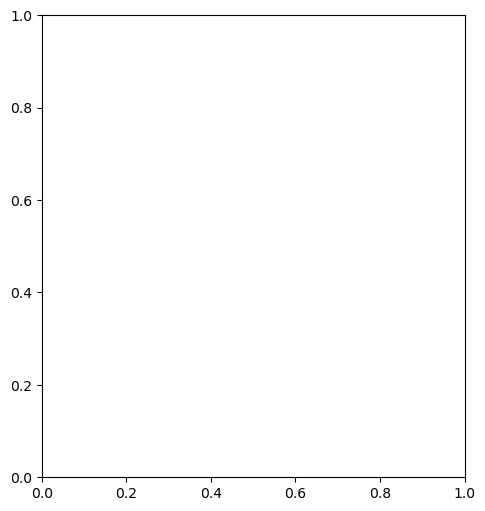

In [43]:
X = data.drop(columns=['median_house_value'])

# Select only numeric columns for imputation
numeric_X = X.select_dtypes(include=['float64', 'int64'])

# Create a copy and apply median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(numeric_X)
X_imputed = pd.DataFrame(X_imputed, columns=numeric_X.columns)

# Plotting the distribution of 'total_bedrooms' before and after imputation
# Plot the histogram of the 'total_bedrooms' column before imputation
fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(1, 2, 1)

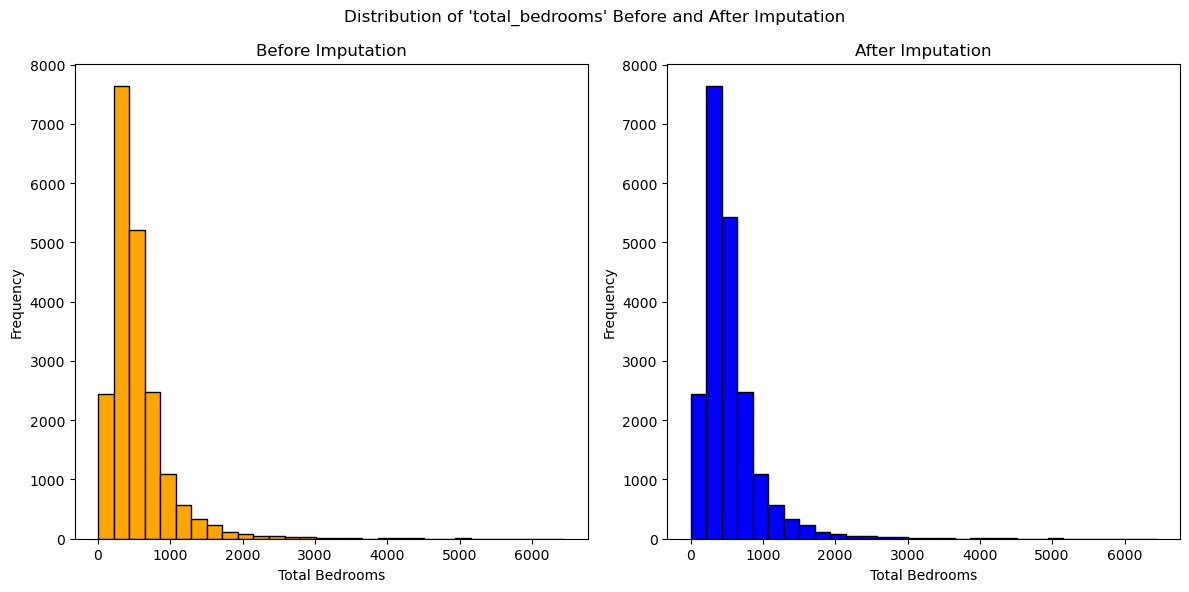

In [46]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before imputation
axes[0].hist(X['total_bedrooms'].dropna(), bins=30, edgecolor='black', color='orange')
axes[0].set_title("Before Imputation")
axes[0].set_xlabel("Total Bedrooms")
axes[0].set_ylabel("Frequency")

# After imputation
axes[1].hist(X_imputed['total_bedrooms'], bins=30, edgecolor='black', color='blue')
axes[1].set_title("After Imputation")
axes[1].set_xlabel("Total Bedrooms")
axes[1].set_ylabel("Frequency")

# Show the graphs
plt.suptitle("Distribution of 'total_bedrooms' Before and After Imputation")
plt.tight_layout()
plt.show()

In [48]:
#Prepare data before and after imputation 

X = data.drop(columns=['median_house_value'])  # Drop the target column to prepare features
X_imputed = X.copy()  # Create a copy of the features
X_imputed['total_bedrooms'] = imputer.fit_transform(X[['total_bedrooms']])  # Impute missing values for 'total_bedrooms'
# Plotting the distribution of 'total_bedrooms' before and after imputation

In [49]:
# Count missing values before and after imputation
nulls_before = X['total_bedrooms'].isnull().sum()
nulls_after = X_imputed['total_bedrooms'].isnull().sum()
print(f"Missing values in 'total_bedrooms' before imputation: {nulls_before}")
print(f"Missing values in 'total_bedrooms' after imputation: {nulls_after}")

Missing values in 'total_bedrooms' before imputation: 207
Missing values in 'total_bedrooms' after imputation: 0


In [50]:
# Create a dataframe to store the number of missing values before and after imputation
#we will call the columns 'state' and 'missing' to distinguish between the two scenarios
missing_data = pd.DataFrame({
    'state': ['Before Imputation', 'After Imputation'],
    'missing': [nulls_before, nulls_after]
})

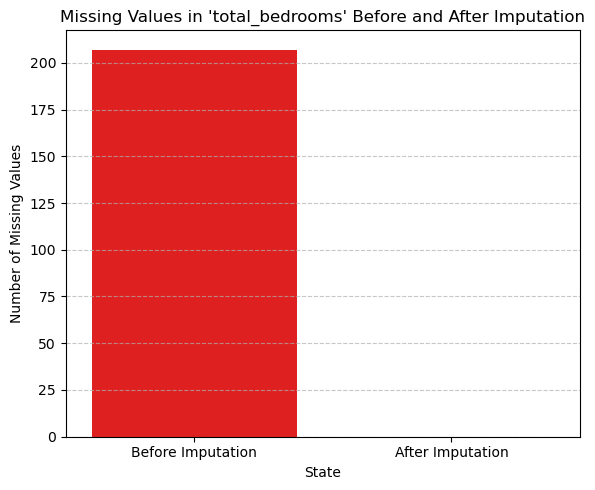

In [52]:
#plot corrected to avoid warning
plt.figure(figsize=(6, 5))
sns.barplot(x='state', y='missing', hue='state', legend=False, data=missing_data, palette=['red', 'green'])
#add a title to the plot for better context and presentation
plt.title("Missing Values in 'total_bedrooms' Before and After Imputation")
# Add labels to the axes
plt.xlabel("State")
plt.ylabel("Number of Missing Values")
#add a grid to the plot for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Automatically adjust subplot parameters to prevent overlapping text, labels, and titles.
#Useful when axis labels are long or when the layout becomes tight
plt.tight_layout()

# Show the plot
plt.show()

6.3 Create a categorical pipepline

# Use OneHotEncoder to Encode Ocean_proximity
# Set handle_unknown = 'ignore' to prevent errors with unseen labels
# Use Sparse_output=False to return a dense array (not sparse)

In [53]:
# categorical pipepline : one-hot encode
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_transformers = OneHotEncoder(handle_unknown='ignore')


6.4 Combine both pipelines using ColumnTransformers:

# Assign the numeric pipeline to numerical columns
# Assign the categorical pipeline to categorical columns

In [56]:
# Combine into full preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformers, ['ocean_proximity'])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)
print(preprocessor)

# Fit and transform the data

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity'])])


6.5 Apply the preprocessing 

#   Drop the targed column median_house_value from the dataset
#  Use .fit_transform() to apply the preprocessor to the features

In [57]:
# Fit and transform the data (excluding the target variable)
X = data.drop(columns=['median_house_value'])
X_scaled = preprocessor.fit_transform(X)

6.6 Convert the result to a new DataFrame

# Extract the new column names from the OneHotEncoder
# Combine them with the numerical features names
# Create a new DataFrame X_scaled_df with those column names 

In [58]:
X_prepared = preprocessor.fit_transform(X)


In [60]:

# 1. Get the transformed column names from OneHotEncoder
# (Assuming the encoder is in a named transformer called 'cat' inside the ColumnTransformer)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(
    input_features=['ocean_proximity']  # categorical column names
)

# 2. Get the numeric column names (they remain unchanged)
num_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()  # numeric column names

# 3. Combine both
all_feature_names = num_features + list(cat_features)

# 4. Create a new DataFrame from the transformed NumPy array
X_scaled_df = pd.DataFrame(X_prepared, columns=all_feature_names)

# Optional: inspect the result
print(X_scaled_df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        0.0       0.0                 0.0          1.0             0.0   
1        0.0       0.0                 0.0          1.0             0.0   
2        0.0       0.0                 0.0          1.0             0.0   
3        0.0       0.0                 0.0          1.0             0.0   
4        0.0       0.0                 0.0          1.0             0.0   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0     -122.23       37.88           41.0                      880.0   
1     -122.22       37.86           21.0                     7099.0   
2     -122.24       37.85           52.0                     1467.0   
3     -122.25       37.85           52.0                     1274.0   
4     -122.25       37.85           52.0                     1627.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   129.0                  

In [62]:
# Convert sclaed output to DataFrame for visualization

encoded_columns = preprocessor.transformers_[0][1].get_feature_names_out(['ocean_proximity'])
all_columns = list(X.columns.difference(['ocean_proximity'])) + list(encoded_columns)
X_scaled_df = pd.DataFrame(X_scaled, columns=all_columns)
# Display the first few rows of the scaled DataFrame
print(X_scaled_df.head())
# Save the preprocessed data to a new CSV file
X_scaled_df.to_csv('preprocessed_housing.csv', index=False)

   households  housing_median_age  latitude  longitude  median_income  \
0         0.0                 0.0       0.0        1.0            0.0   
1         0.0                 0.0       0.0        1.0            0.0   
2         0.0                 0.0       0.0        1.0            0.0   
3         0.0                 0.0       0.0        1.0            0.0   
4         0.0                 0.0       0.0        1.0            0.0   

   population  total_bedrooms  total_rooms  ocean_proximity_<1H OCEAN  \
0     -122.23           37.88         41.0                      880.0   
1     -122.22           37.86         21.0                     7099.0   
2     -122.24           37.85         52.0                     1467.0   
3     -122.25           37.85         52.0                     1274.0   
4     -122.25           37.85         52.0                     1627.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   129.0                  

7- SPLIT THE DATA

7.1 Separate feautures and target variable 

In [63]:
# Step 1: Split the dataset into features (X) and target variable (y)
#Use 'median_house_value' as the target column and drop it from the features set
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

7.2 Split the dataset into training and test sets

In [64]:
#Step 2: Use train_test_split to split the data into training and testing sets
#Set the test size to 20% and random state to 42 for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [66]:



print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 13)
X_test shape: (4128, 13)
y_train shape: (16512,)
y_test shape: (4128,)


In [68]:
# compute totals and percentages


total_rows = len(X_train)
train_rows = len(X_train)
test_rows = len(X_test)
train_percentage = (train_rows / total_rows) * 100
test_percentage = (test_rows / total_rows) * 100
print(f"Total rows: {total_rows}")
print(f"Training set rows: {train_rows} ({train_percentage:.2f}%)")
print(f"Testing set rows: {test_rows} ({test_percentage:.2f}%)")

Total rows: 16512
Training set rows: 16512 (100.00%)
Testing set rows: 4128 (25.00%)


In [69]:
# calculate the number of samples, and the number of rows in train and test sets
# Also calculate the percentage of samples in each set (rounded to 2 decimal places)

train_pct = (len(X_train) / len(X)) * 100
test_pct = (len(X_test) / len(X)) * 100
print(f"Training set size: {len(X_train)} ({train_pct:.2f}%)")
print(f"Testing set size: {len(X_test)} ({test_pct:.2f}%)")

Training set size: 16512 (80.00%)
Testing set size: 4128 (20.00%)


In [70]:
#Step 4: Define the labels and sizes for the pie chart
# Include both the parcentage and number of rows in the labels

labels = [
    f"Training Set: {len(X_train)} ({train_pct:.2f}%)",
    f"Testing Set: {len(X_test)} ({test_pct:.2f}%)"
]
sizes = [len(X_train), len(X_test)]

colors = ['#66c2a5', '#fc8d62']  # Custom colors for the pie chart
# Step 5: Create the pie chart

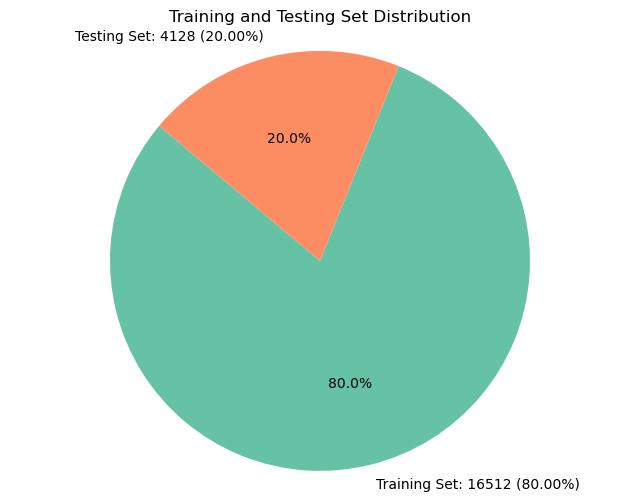

In [71]:
#step 5: Plot the pie chart using matplotlib
# set figsize 
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Training and Testing Set Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle
plt.show()

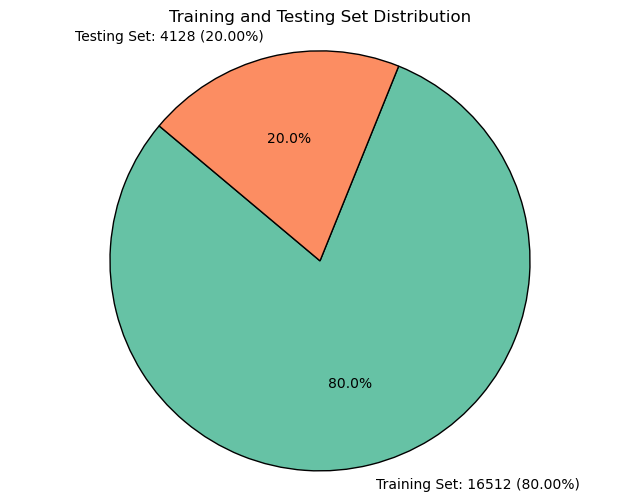

In [72]:
# Step 5: Plot the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}  # black edges
)
plt.title('Training and Testing Set Distribution')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()